## Data Analysis

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("../Data/gears_stage3.csv", sep=',')

In [6]:
df.head(4)

,location,location_town,first_rental_day,return_date,gear_name,price,rental_duration,price_per_day,gear_class
0,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,Ski Exclusive,49.5,1,49.5,ski
1,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,Ski Premium,34.2,1,34.2,ski
2,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,Telemark Ski Premium,49.5,1,49.5,ski
3,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,Ski Economy,26.1,1,26.1,ski


In [9]:
df_selection = df[['location_town', 'price_per_day']][df['gear_name'].str.lower() == "ski premium"]

In [11]:
df_prices = df_selection.groupby('location_town')['price_per_day'].mean().reset_index()

<Axes: >

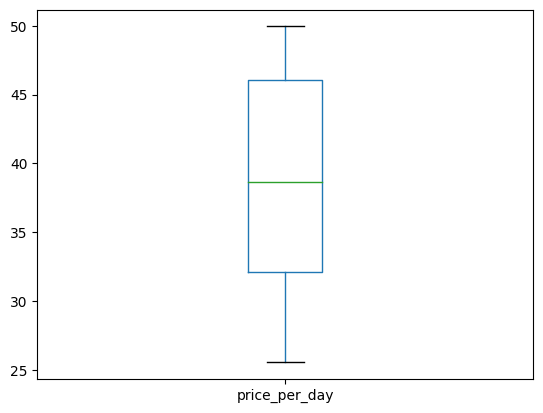

In [13]:
df_prices.boxplot(column='price_per_day', grid=False)


In [15]:
df_prices.loc[df_prices['price_per_day'].idxmax()]


location_town    Sils i.E.
price_per_day        49.95
Name: 30, dtype: object

In [16]:
df_prices.loc[df_prices['price_per_day'].idxmin()]


location_town    Buttes La Robella
price_per_day                25.55
Name: 5, dtype: object